# Exercise 04


# Part 1 - Linear Regression

Estimate a regression using the Income data


## Forecast of income

We'll be working with a dataset from US Census indome ([data dictionary](https://archive.ics.uci.edu/ml/datasets/Adult)).

Many businesses would like to personalize their offer based on customer’s income. High-income customers could be, for instance, exposed to premium products. As a customer’s income is not always explicitly known, predictive model could estimate income of a person based on other information.

Our goal is to create a predictive model that will be able to output an estimation of a person income.

In [523]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

# read the data and set the datetime as the index
income = pd.read_csv('https://github.com/albahnsen/PracticalMachineLearningClass/raw/master/datasets/income.csv.zip', index_col=0)

income.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,51806.0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,68719.0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,51255.0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,47398.0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,30493.0


In [187]:
income.shape

(32561, 15)

# Exercise 4.1 

What is the relation between the age and Income?

For a one percent increase in the Age how much the income increases?

Using sklearn estimate a linear regression and predict the income when the Age is 30 and 40 years

Text(0,0.5,'Income')

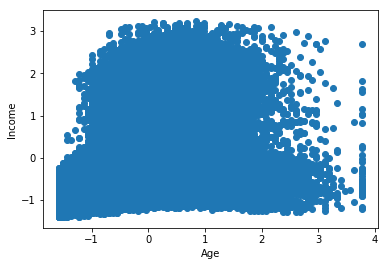

In [524]:
# Normalizar los datos X - y
y = income['Income'].values
X = income['Age'].values

y_mean, y_std = y.mean(), y.std()
X_mean, X_std = X.mean(), X.std()

y = (y - y_mean)/ y_std
X = (X - X_mean)/ X_std

cor = np.corrcoef(X, y)

plt.scatter(X, y)
plt.xlabel('Age')
plt.ylabel('Income')

In [526]:
print ('Graficamente no se observa algún tipo de relación entre las dos variables de estudio')

Graficamente no se observa algún tipo de relación entre las dos variables de estudio


In [527]:
print('La correlacion entre edad e ingresos es:',(cor[0][1]))
print ('Se presenta una correlación positiva de entre Edad e Ingresos de 0.29, es decir que por cada'+ 
       ' año de incremento en edad el ingreso aumenta en 0.29')

('La correlacion entre edad e ingresos es:', 0.2904082980024349)
Se presenta una correlación positiva de entre Edad e Ingresos de 0.29, es decir que por cada año de incremento en edad el ingreso aumenta en 0.29


In [528]:
# Import
from sklearn.linear_model import LinearRegression

y = income['Income'].values
X = income['Age'].values

# Initialize
linreg = LinearRegression()

# create X
n_samples = X.shape[0]
X_ = np.c_[np.ones(n_samples), X]

# Fit
linreg.fit(X_, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [529]:
print('Por cada punto de incremento en la edad, el ingreso cambia en: ' + repr(linreg.intercept_))

Por cada punto de incremento en la edad, el ingreso cambia en: 32538.088130868637


In [530]:
# prediction para edad=30 y edad=40
feature_cols = ['Age']
X = income[feature_cols]
y = income.Income
linreg.fit(X, y)
y30 = linreg.intercept_ + linreg.coef_ * 30
y40 = linreg.intercept_ + linreg.coef_ * 40
print("Se estima que para una persona de 30 años el ingreso es: " + repr(y30[0]))
print("Se estima que para una persona de 40 años el ingreso es: " + repr(y40[0]))

Se estima que para una persona de 30 años el ingreso es: 48803.11784304026
Se estima que para una persona de 40 años el ingreso es: 54224.79441376413


# Exercise 4.2
    Evaluate the model using the MSE

In [410]:
from sklearn import metrics
import numpy as np

y = income['Income'].values
X = income['Age'].values

# Initialize
linreg = LinearRegression()
linreg.fit(X[:, None], y)

y_pred = linreg.predict(X[:, None])

print('MSE:', metrics.mean_squared_error(y, y_pred))

('MSE:', 593783043.8402299)



# Exercise 4.3

Run a regression model using as features the Age and Age$^2$ using the OLS equations

In [438]:
income['Age2'] = income['Age']**2
income.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Income,Age2
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,51806.0,1521
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,68719.0,2500
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,51255.0,1444
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,47398.0,2809
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,30493.0,784


In [455]:

# Normalizar los datos X - y
y = income['Income'].values
X2 = income['Age2'].values

y_mean, y_std = y.mean(), y.std()
X2_mean, X2_std = X2.mean(), X2.std()

y = (y - y_mean)/ y_std
X2 = (X2 - X2_mean)/ X2_std

# create X2
n_samples2 = X2.shape[0]
X_2 = np.c_[np.ones(n_samples2), X2]

betaX1 = np.dot(np.linalg.inv(np.dot(X_.T, X_)),np.dot(X_.T, y))
betaX2 = np.dot(np.linalg.inv(np.dot(X_2.T, X_2)),np.dot(X_2.T, y))

print ('Betas Age$^2$ using the OLS equations', betaX2)
print ('Betas Age using the OLS equations', betaX1)


('Betas Age$^2$ using the OLS equations', array([6.07317590e-17, 2.31271467e-01]))
('Betas Age using the OLS equations', array([-0.82142574,  0.02129058]))


# Exercise 4.4


Estimate a regression using more features.

How is the performance compared to using only the Age?

In [454]:
betaX2-betaX1

array([0.82142574, 0.20998088])

# Part 2: Logistic Regression

### Customer Churn: 
losing/attrition of the customers from the company. Especially, the industries that the user acquisition is costly, it is crucially important for one company to reduce and ideally make the customer churn to 0 to sustain their recurring revenue. If you consider customer retention is always cheaper than customer acquisition and generally depends on the data of the user(usage of the service or product), it poses a great/exciting/hard problem for machine learning.

### Data
Dataset is from a telecom service provider where they have the service usage(international plan, voicemail plan, usage in daytime, usage in evenings and nights and so on) and basic demographic information(state and area code) of the user. For labels, I have a single data point whether the customer is churned out or not.


In [980]:
# Download the dataset
data = pd.read_csv('https://github.com/ghuiber/churn/raw/master/data/churn.csv')
data.shape

(3333, 21)

In [981]:
data.tail()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False.
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False.
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False.
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False.
3332,TN,74,415,400-4344,no,yes,25,234.4,113,39.85,...,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False.


# Exercise 4.5

Create Y and X

What is the distribution of the churners?

Split the data in train (70%) and test (30%)


(2333, 22) (2333L,)
(1000, 22) (1000L,)

 La distribución de los churners es: 


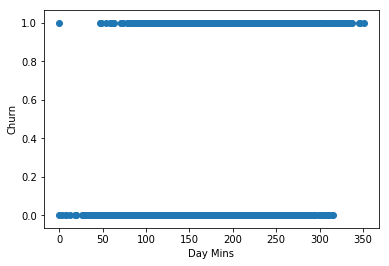

In [985]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit

X = data['Day Mins']
yi = data['Churn?']

data['NChurn'] = yi.map({"False.":0, "True.":1})
y = data['NChurn']

# examine Churn
data.NChurn.value_counts().sort_index()

plt.scatter(X, y)
plt.xlabel('Day Mins')
plt.ylabel('Churn')

X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.3)
print X_train.shape, y_train.shape
print X_test.shape, y_test.shape

print ('\n La distribución de los churners es: ')


# Exercise 4.6

Train a Logistic Regression using the training set and apply the algorithm to the testing set.

In [1004]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

#Xtr = X_train['Day Mins']
#ytr = X_train['NChurn']

# Initialize
logreg = LogisticRegression(solver='liblinear',C=1e9)

# create X
feature_cols = ['Day Mins']
X = X_train[feature_cols]
y = X_train.NChurn
logreg.fit(X,y)
y_pred = logreg.predict(X)


Text(0,0.5,'Churn')

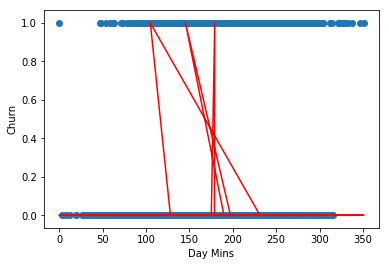

In [1005]:
# scatter plot that includes the regression line
plt.scatter(X, y)
plt.plot(X, y_pred_class, color='red')
plt.xlabel('Day Mins')
plt.ylabel('Churn')

# Exercise 4.7

a) Create a confusion matrix using the prediction on the 30% set.

b) Estimate the accuracy of the model in the 30% set


In [1003]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y, y_pred, labels=None, sample_weight=None)

array([[1999,    0],
       [ 334,    0]], dtype=int64)

In [1009]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)